# Import and installtion

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import graphviz 
import yellowbrick
import sklearn

In [2]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix

In [3]:
balance_data = pd.read_csv('Loan Dataset.csv')

In [4]:
len(balance_data)

1000

In [5]:
balance_data.shape

(1000, 5)

In [6]:
#balance_data.drop(['sum'],axis=1,inplace=True)

In [7]:
balance_data.head(3)

,Initial Payment,Last Payment,Credit Score,House nuber,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes


In [8]:
X = balance_data.values[:, :4]
Y = balance_data.values[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [10]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [11]:
y_pred_en = clf_entropy.predict(X_test)

In [12]:
print ("Accuracy is :")
metrics.accuracy_score(y_test,y_pred_en)

Accuracy is :


0.9366666666666666

C:\Users\itaig\AppData\Roaming\Python\Python39\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


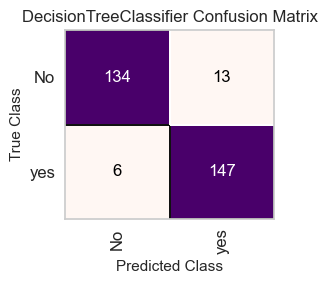

<AxesSubplot: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(clf_entropy, cmap='RdPu')
cm.score(X_test, y_test)
cm.poof()

[Text(0.5, 0.875, 'x[1] <= 12545.0\nentropy = 0.997\nsamples = 700\nvalue = [374, 326]'),
 Text(0.25, 0.625, 'x[1] <= 11566.5\nentropy = 0.534\nsamples = 345\nvalue = [42, 303]'),
 Text(0.125, 0.375, 'x[0] <= 485.5\nentropy = 0.045\nsamples = 204\nvalue = [1, 203]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(0.1875, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.375, 0.375, 'x[3] <= 4343.5\nentropy = 0.87\nsamples = 141\nvalue = [41, 100]'),
 Text(0.3125, 0.125, 'entropy = 0.302\nsamples = 93\nvalue = [5, 88]'),
 Text(0.4375, 0.125, 'entropy = 0.811\nsamples = 48\nvalue = [36, 12]'),
 Text(0.75, 0.625, 'x[1] <= 13235.5\nentropy = 0.346\nsamples = 355\nvalue = [332, 23]'),
 Text(0.625, 0.375, 'x[3] <= 3588.5\nentropy = 0.788\nsamples = 89\nvalue = [68, 21]'),
 Text(0.5625, 0.125, 'entropy = 0.811\nsamples = 24\nvalue = [6, 18]'),
 Text(0.6875, 0.125, 'entropy = 0.27\nsamples = 65\nvalue = [62, 3]'),
 Text(0.875, 0.375, 'x[0] <= 128.5\

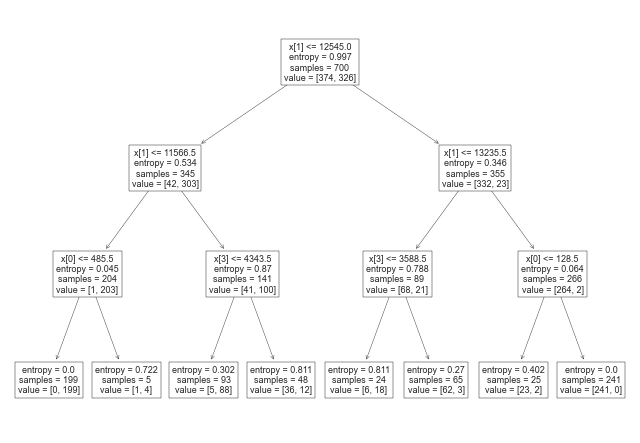

In [14]:
tree.plot_tree(clf_entropy)